# Dating App Reviews: Exploratory Data Analysis

In [28]:
#pip install seaborn
#pip install plotly
#pip install wordcloud

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import plotly.graph_objects as go

In [30]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [31]:
dating_apps = pd.read_csv('Dating_Apps.csv')
dating_apps.head()

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,0,linah sibanda,On this app i cant find a partner,5,0,2022-02-18 01:19:00,Tinder
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,2022-02-18 01:16:00,Tinder
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,2022-02-18 01:11:00,Tinder
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,2022-02-18 01:11:00,Tinder
4,4,Arthur Magamedov,Love it!,5,0,2022-02-18 01:06:00,Tinder


In [32]:
dating_apps['Date&Time']= pd.to_datetime(dating_apps['Date&Time'])
dating_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681994 entries, 0 to 681993
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  681994 non-null  int64         
 1   Name        681989 non-null  object        
 2   Review      680642 non-null  object        
 3   Rating      681994 non-null  int64         
 4   #ThumbsUp   681994 non-null  int64         
 5   Date&Time   681994 non-null  datetime64[ns]
 6   App         681994 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 36.4+ MB


In [33]:
dating_apps.describe()

,Unnamed: 0,Rating,#ThumbsUp
count,681994.000000,681994.000000,681994.000000
mean,213062.414738,2.997185,1.873719
std,163040.355531,1.746951,24.448095
min,0.000000,1.000000,0.000000
25%,58752.000000,1.000000,0.000000
50%,185618.500000,3.000000,0.000000
75%,356116.750000,5.000000,0.000000
max,526615.000000,5.000000,5507.000000


In [34]:
dating_apps["Date"] = pd.to_datetime(dating_apps['Date&Time']).dt.date
dating_apps["Time"] = pd.to_datetime(dating_apps['Date&Time']).dt.time
dating_apps.head()

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App,Date,Time
0,0,linah sibanda,On this app i cant find a partner,5,0,2022-02-18 01:19:00,Tinder,2022-02-18,01:19:00
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,2022-02-18 01:16:00,Tinder,2022-02-18,01:16:00
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,2022-02-18 01:11:00,Tinder,2022-02-18,01:11:00
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,2022-02-18 01:11:00,Tinder,2022-02-18,01:11:00
4,4,Arthur Magamedov,Love it!,5,0,2022-02-18 01:06:00,Tinder,2022-02-18,01:06:00


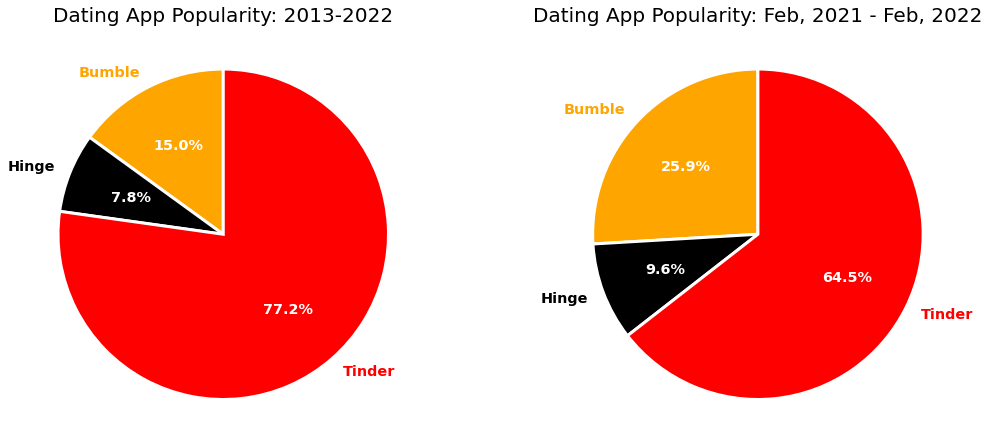

In [35]:
apps_count = dating_apps.groupby('App').size()
apps_count = apps_count.reset_index()
apps_count.sort_values([0], ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=100)

patches, texts, pcts = ax[0].pie(
    apps_count[0], labels=apps_count['App'], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=['orange', 'black', 'red'])
# Style just the percent values.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight='bold')
ax[0].set_title('Dating App Popularity: 2013-2022', fontsize=20)

dating_apps_2021 = dating_apps.loc[((dating_apps['Date&Time']) > '2021-02-18') & 
                                       ((dating_apps['Date&Time']) < '2022-02-18')]


apps_count = dating_apps_2021.groupby('App').size()
apps_count = apps_count.reset_index()
apps_count.sort_values([0], ascending=False)

patches, texts, pcts = ax[1].pie(
    apps_count[0], labels=apps_count['App'], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=['orange', 'black', 'red'])
# Style just the percent values.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight='bold')
ax[1].set_title('Dating App Popularity: Feb, 2021 - Feb, 2022', fontsize=20)

plt.tight_layout()

##### - The pie chart on the left shows the popularity of the Apps by counting the number of reviews left.
##### - The pie chart on the right shows the same, but for the most recent year.

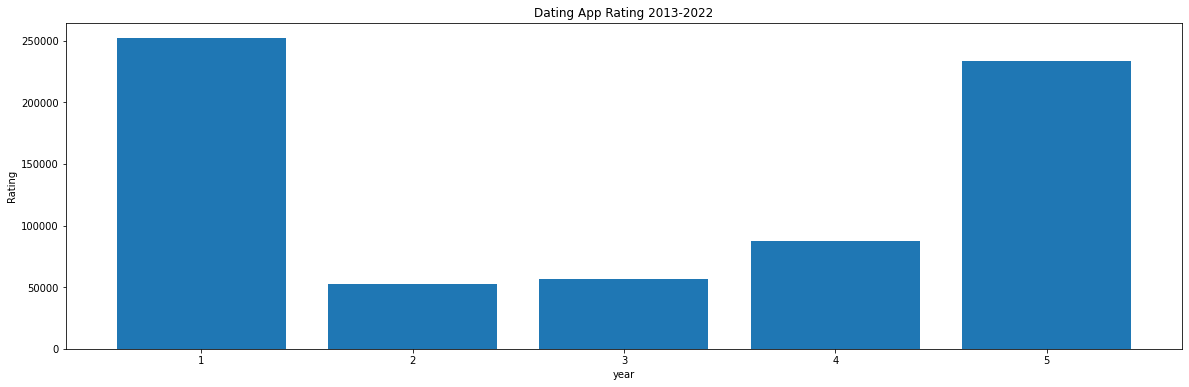

In [36]:
plt.bar(list((1,2,3,4,5)), dating_apps.groupby('Rating').size())
plt.title('Dating App Rating 2013-2022')
plt.xlabel('year')
plt.ylabel('Rating')
plt.show()

In [37]:
Tinder_df = dating_apps.loc[dating_apps['App'] == 'Tinder'].sort_values('#ThumbsUp', ascending = False)
Bumble_df = dating_apps.loc[dating_apps['App'] == 'Bumble'].sort_values('#ThumbsUp', ascending = False)
Hinge_df = dating_apps.loc[dating_apps['App'] == 'Hinge'].sort_values('#ThumbsUp', ascending = False)

In [38]:
#Variables for easier visualization
apps_list = [Tinder_df, Bumble_df, Hinge_df]
apps_name = ['Tinder', 'Bumble', 'Hinge']
apps_colors = ['red', 'orange', 'black']

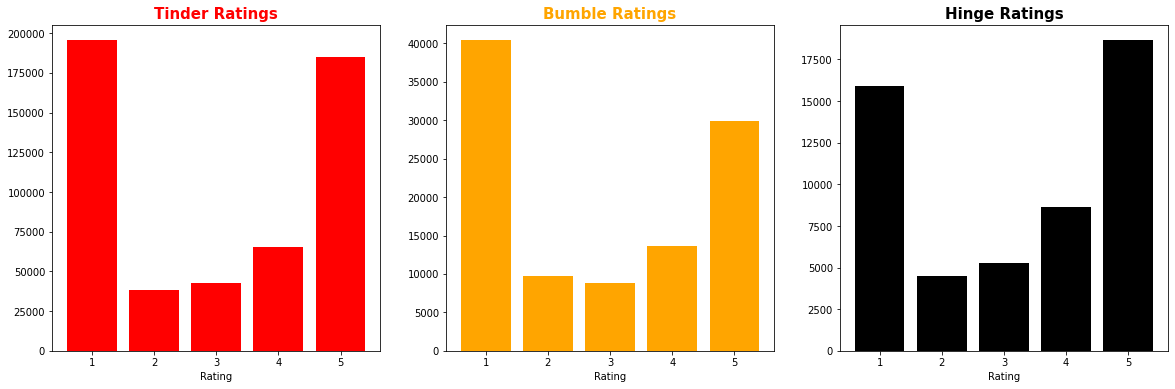

In [39]:
plt.rcParams['figure.figsize'] = [20, 6]

for i in range(len(apps_list)):
    plt.subplot(1, 3, i+1)
    plt.title(apps_name[i] +' Ratings', fontweight="bold", size=15, color = apps_colors[i])
    plt.xlabel('Rating')
    plt.bar(list((1,2,3,4,5)), apps_list[i].groupby('Rating').size(), color = apps_colors[i])

plt.show()

##### Notice that although there are slight differences, but all three apps get 1 or 5

In [40]:
grouped_app_date = dating_apps.groupby(['App', 'Date']).agg(Avg_Rating=("Rating",'mean'))
grouped_app_date = grouped_app_date.reset_index()
grouped_app_date

,App,Date,Avg_Rating
0,Bumble,2015-01-12,4.600000
1,Bumble,2015-02-12,2.600000
2,Bumble,2015-03-12,2.100000
3,Bumble,2015-04-12,1.833333
4,Bumble,2015-05-12,2.600000
...,...,...,...
7032,Tinder,2022-10-02,2.658824
7033,Tinder,2022-11-01,2.439560
7034,Tinder,2022-11-02,2.341040
7035,Tinder,2022-12-01,2.443243


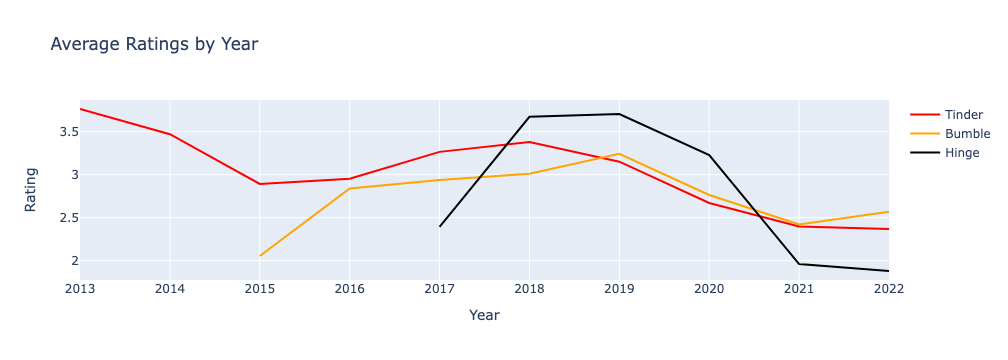

In [41]:
dating_apps["Year"] = pd.to_datetime(dating_apps['Date&Time']).dt.year
grouped_app_year = dating_apps.groupby(['App', 'Year']).agg(Avg_Rating=("Rating",'mean'))
grouped_app_year = grouped_app_year.reset_index()

fig = go.Figure()

for i in range(len(apps_list)):
    grouped_app_year_temp = grouped_app_year.loc[grouped_app_year['App'] == apps_name[i]]
    fig.add_trace(go.Scatter(x=grouped_app_year_temp['Year'], y=grouped_app_year_temp['Avg_Rating'],
                    line=dict(color=apps_colors[i]),
                    mode='lines',
                    name=apps_name[i]))

fig.update_layout(title='Average Ratings by Year',
                   xaxis_title='Year',
                   yaxis_title='Rating')

fig.show()

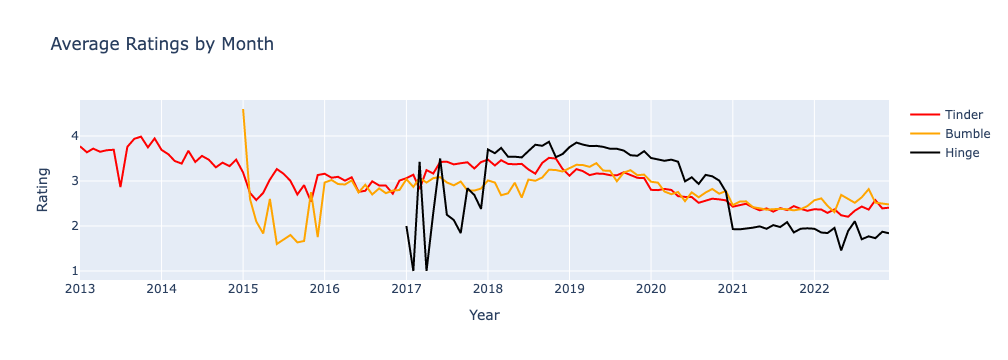

In [42]:
dating_apps["Months"] = pd.to_datetime(dating_apps['Date&Time']).dt.strftime('%Y-%m')
grouped_app_month = dating_apps.groupby(['App', 'Months']).agg(Avg_Rating=("Rating",'mean'))
grouped_app_month = grouped_app_month.reset_index()

fig = go.Figure()

for i in range(len(apps_list)):
    grouped_app_month_temp = grouped_app_month.loc[grouped_app_month['App'] == apps_name[i]]
    fig.add_trace(go.Scatter(x=grouped_app_month_temp['Months'], y=grouped_app_month_temp['Avg_Rating'],
                    line=dict(color=apps_colors[i]),
                    mode='lines',
                    name=apps_name[i]))

fig.update_layout(title='Average Ratings by Month',
                   xaxis_title='Year',
                   yaxis_title='Rating')

fig.show()    


In [43]:
# Does a certain time of the day or a certain month of the year affect the result of ... 
# Average Rating? Leaving Rating Frequency? Number of Thumbs?

In [44]:
dating_apps_time_temp = dating_apps
dating_apps_time_temp

dating_apps_time_temp['month'] = dating_apps_time_temp['Date&Time'].dt.month
dating_apps_time_temp['hour'] = dating_apps_time_temp['Date&Time'].dt.hour
dating_apps_time_temp.head()

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App,Date,Time,Year,Months,month,hour
0,0,linah sibanda,On this app i cant find a partner,5,0,2022-02-18 01:19:00,Tinder,2022-02-18,01:19:00,2022,2022-02,2,1
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,2022-02-18 01:16:00,Tinder,2022-02-18,01:16:00,2022,2022-02,2,1
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,2022-02-18 01:11:00,Tinder,2022-02-18,01:11:00,2022,2022-02,2,1
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,2022-02-18 01:11:00,Tinder,2022-02-18,01:11:00,2022,2022-02,2,1
4,4,Arthur Magamedov,Love it!,5,0,2022-02-18 01:06:00,Tinder,2022-02-18,01:06:00,2022,2022-02,2,1


### Histograms by Month and Time

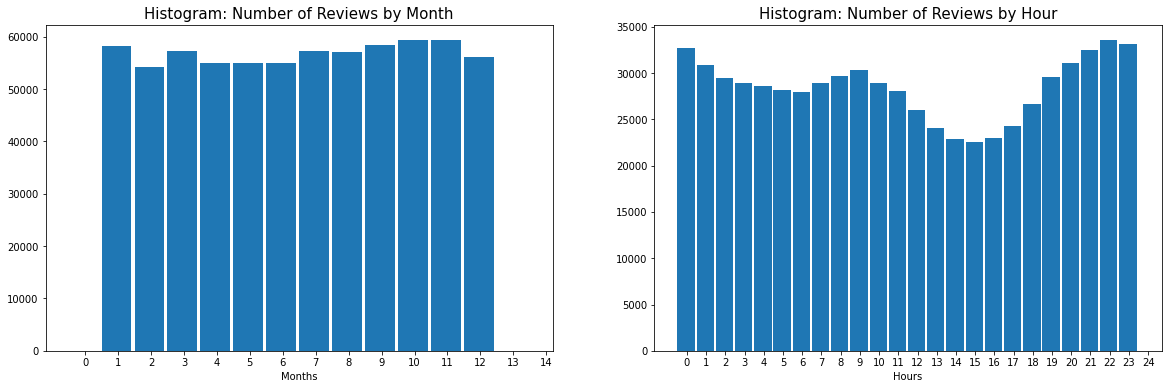

In [45]:
# Hour and Month Histogram Plot
plt.subplot(1, 2, 2)

bins = np.arange(25) - 0.5
plt.hist(dating_apps_time_temp['hour'], bins, width=0.9)
plt.xticks(range(25))
plt.title('Histogram: Number of Reviews by Hour', size=15)
plt.xlabel('Hours')

plt.subplot(1, 2, 1)

bins = np.arange(15) - 0.5
plt.hist(dating_apps_time_temp['month'], bins, width=0.9)
plt.xticks(range(15))
plt.title('Histogram: Number of Reviews by Month', size=15)
plt.xlabel('Months')

plt.show()

##### - Not much correlation can be found from the histogram on the left based on the visualization.
##### - We can see that less reviews are posted during the day time.

### Average Ratings by Time

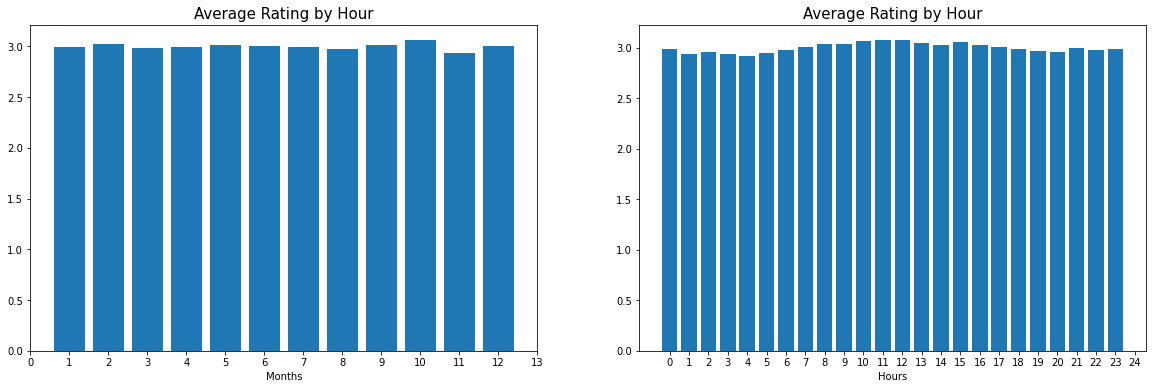

In [46]:
plt.subplot(1,2,2)

grouped_app_months = dating_apps.groupby('hour').agg(Avg_Rating=("Rating",'mean'))
grouped_app_months = grouped_app_months.reset_index()
grouped_app_months

plt.bar(grouped_app_months['hour'], grouped_app_months['Avg_Rating'])
plt.xticks(range(25))
plt.title('Average Rating by Hour', size=15)
plt.xlabel('Hours')

plt.subplot(1,2,1)

grouped_app_months = dating_apps.groupby('month').agg(Avg_Rating=("Rating",'mean'))
grouped_app_months = grouped_app_months.reset_index()
grouped_app_months

plt.bar(grouped_app_months['month'], grouped_app_months['Avg_Rating'])
plt.xticks(range(14))
plt.title('Average Rating by Hour', size=15)
plt.xlabel('Months')

plt.show()

##### No correlation between time intervals and rating

## Number of Thumbs:

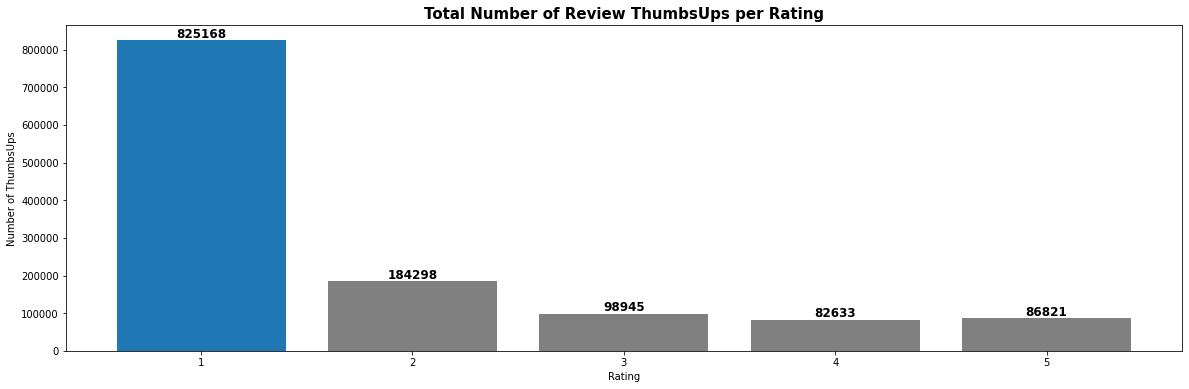

In [47]:
# Which reviews get more thumbs up?
numThumbs_Rating = dating_apps.groupby('Rating').agg(Total_ThumbsUps=("#ThumbsUp",'sum'))
numThumbs_Rating = numThumbs_Rating.reset_index()
numThumbs_Rating

fig, ax = plt.subplots()

colors = ['#1f77b4' if (bar == max(numThumbs_Rating['Total_ThumbsUps'])) else 'grey' for bar in 
          numThumbs_Rating['Total_ThumbsUps']]
plt.bar(numThumbs_Rating['Rating'], numThumbs_Rating['Total_ThumbsUps'], color = colors)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold", color = 'black', size=12)
plt.title('Total Number of Review ThumbsUps per Rating', fontweight="bold", size=15)
plt.xlabel('Rating')
plt.ylabel('Number of ThumbsUps')
plt.show()


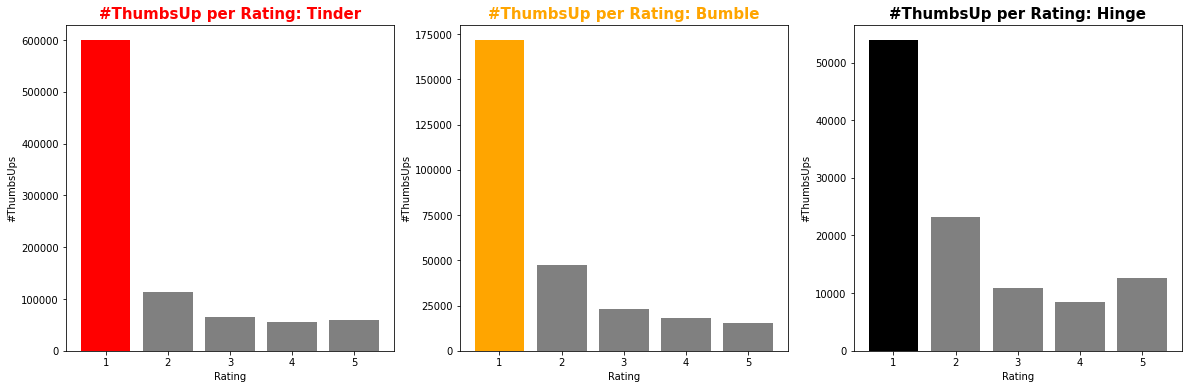

In [21]:
# Number of Thumbs up by Rating for each dating apps
# Highlighting the highest value
plt.rcParams['figure.figsize'] = [20, 6]

for i in range(len(apps_list)):
    numThumbs_Rating = apps_list[i].groupby('Rating').agg(Total_ThumbsUps=("#ThumbsUp",'sum'))
    numThumbs_Rating = numThumbs_Rating.reset_index()
    numThumbs_Rating
    
    plt.subplot(1, 3, i+1)
    
    colors = [apps_colors[i] if (bar == max(numThumbs_Rating['Total_ThumbsUps'])) 
              else 'grey' for bar in numThumbs_Rating['Total_ThumbsUps']]
    plt.bar(numThumbs_Rating['Rating'], numThumbs_Rating['Total_ThumbsUps'], color = colors)
    plt.title('#ThumbsUp per Rating: '+apps_name[i], fontweight="bold", size=15, color = apps_colors[i])
    plt.xlabel('Rating')
    plt.ylabel('#ThumbsUps')
    
plt.show()

##### Notice that people find Rating:1 reviews extremely more helpful compared to the other reviews of different ratings. 

### Review Key Words: Rating 1 

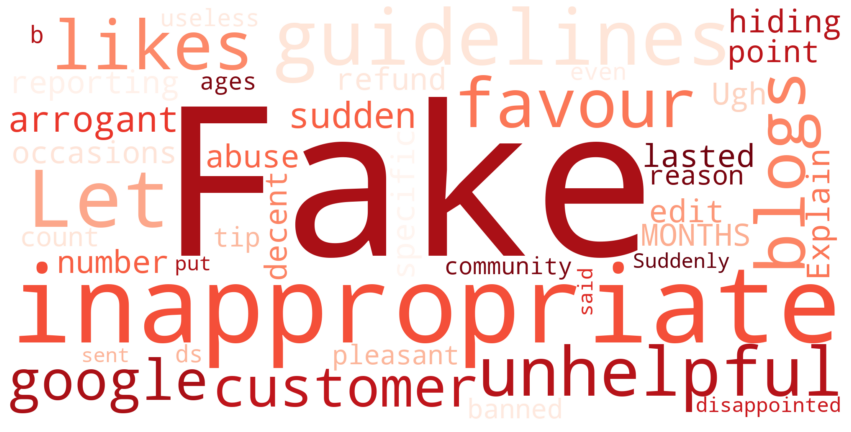

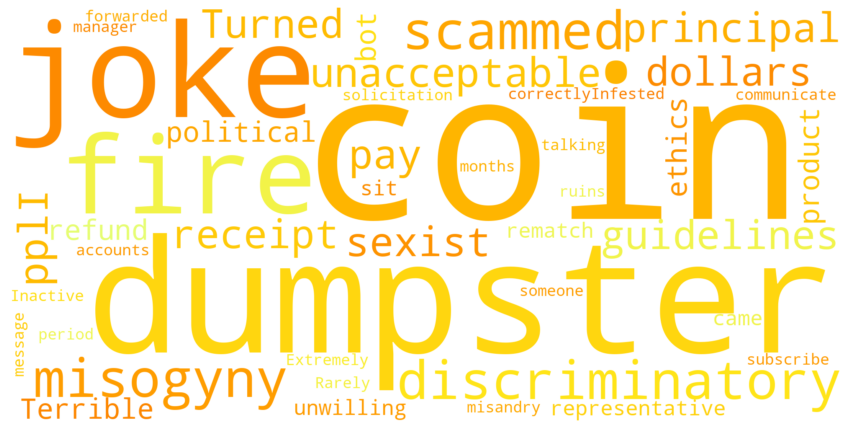

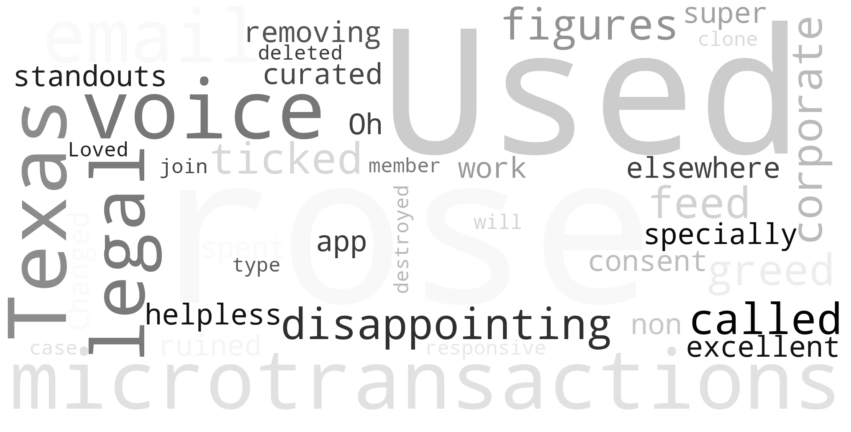

In [24]:
# Most popular words in reviews of Rating:1
colormaps = ['Reds', 'Wistia', 'Greys']
for i in range(len(apps_list)):
    a = list(apps_list[i].loc[apps_list[i]['Rating'] == 1].head(5)['Review'].str.split())

    one_string = ''.join(apps_list[i].loc[(apps_list[i]['Rating'] == 1) & apps_list[i]['Review']
                                          .notna()].head(5)['Review'].tolist())
    list_1 = one_string.split()
    list_1

    one_string = ''.join(apps_list[i].loc[(apps_list[i]['Rating'] == 5) & apps_list[i]['Review']
                                          .notna()].head(1000)['Review'].tolist())
    list_5 = one_string.split()
    list_5

    result = set(list_1) - set(list_5)
    result
    
    text = " ".join(i for i in result)
    
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=2000, height=1000, stopwords=stopwords, background_color="white",  
                          colormap=colormaps[i], max_font_size=500).generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Review Key Words: Rating 5 

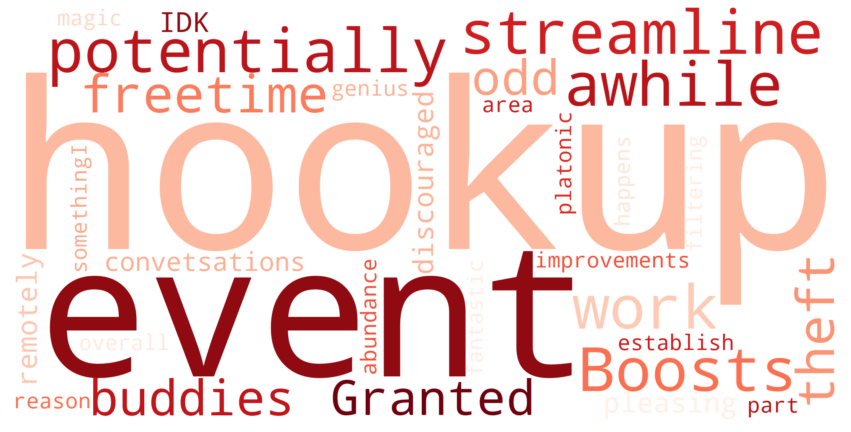

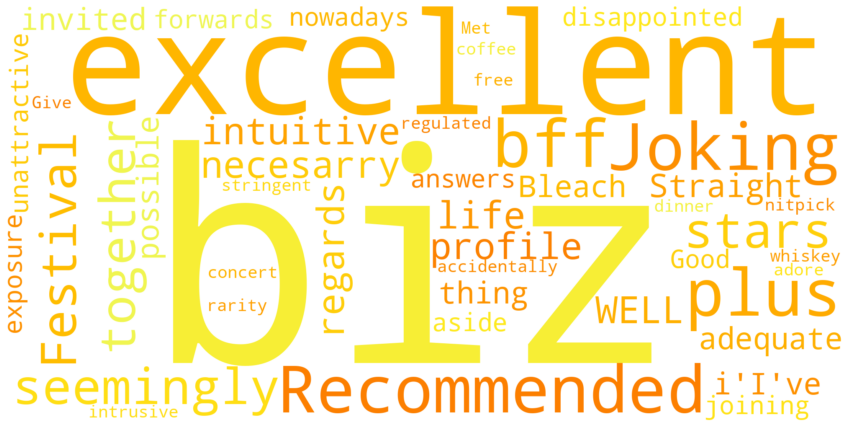

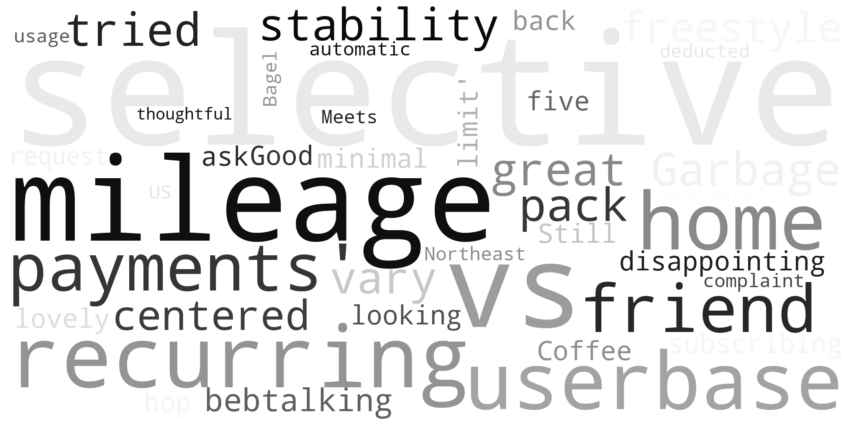

In [25]:
# Most popular words in reviews of Rating:5
colormaps = ['Reds', 'Wistia', 'Greys']
for i in range(len(apps_list)):
    a = list(apps_list[i].loc[apps_list[i]['Rating'] == 1].head(5)['Review'].str.split())

    one_string = ''.join(apps_list[i].loc[(apps_list[i]['Rating'] == 1) & apps_list[i]['Review']
                                          .notna()].head(1000)['Review'].tolist())
    list_1 = one_string.split()
    list_1

    one_string = ''.join(apps_list[i].loc[(apps_list[i]['Rating'] == 5) & apps_list[i]['Review']
                                          .notna()].head(5)['Review'].tolist())
    list_5 = one_string.split()
    list_5

    result = set(list_5) - set(list_1)
    result
    
    text = " ".join(i for i in result)
    
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=2000, height=1000, stopwords=stopwords, background_color="white",  
                          colormap=colormaps[i], max_font_size=700).generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()